<a href="https://colab.research.google.com/github/KareemEzzaldin/Elevvo_ML_StudentScorePrediction/blob/main/Elevvo_ML_Student_Score_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
df = pd.read_csv("/content/StudentPerformanceFactors.csv")
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [ ]:
df.isna().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
# Analyze the distribution of values in columns with nulls
for col in ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']:
    print(f"Value counts for {col}:")
    print(df[col].value_counts(dropna=False))
    print("\n")

# Discuss potential strategies
print("Strategies for handling null values:")
print("- Dropping rows with nulls: This is suitable if the number of nulls is small and dropping them won't significantly reduce the dataset size.")
print("- Filling with mean/median: Suitable for numerical data, depending on the distribution (mean for symmetrical, median for skewed).")
print("- Filling with mode: Suitable for categorical data.")
print("- More advanced imputation techniques: Consider techniques like k-NN imputation or regression imputation for more complex cases.")

Value counts for Teacher_Quality:
Teacher_Quality
Medium    3925
High      1947
Low        657
NaN         78
Name: count, dtype: int64


Value counts for Parental_Education_Level:
Parental_Education_Level
High School     3223
College         1989
Postgraduate    1305
NaN               90
Name: count, dtype: int64


Value counts for Distance_from_Home:
Distance_from_Home
Near        3884
Moderate    1998
Far          658
NaN           67
Name: count, dtype: int64


Strategies for handling null values:
- Dropping rows with nulls: This is suitable if the number of nulls is small and dropping them won't significantly reduce the dataset size.
- Filling with mean/median: Suitable for numerical data, depending on the distribution (mean for symmetrical, median for skewed).
- Filling with mode: Suitable for categorical data.
- More advanced imputation techniques: Consider techniques like k-NN imputation or regression imputation for more complex cases.


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# Quantitive Data
quantative_data = df.select_dtypes(include=['int64', 'float64'])
quantative_data

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
0,23,84,7,73,0,3,67
1,19,64,8,59,2,4,61
2,24,98,7,91,2,4,74
3,29,89,8,98,1,4,71
4,19,92,6,65,3,4,70
...,...,...,...,...,...,...,...
6602,25,69,7,76,1,2,68
6603,23,76,8,81,3,2,69
6604,20,90,6,65,3,2,68
6605,10,86,6,91,2,3,68


In [ ]:
# Qualtitive Data
qualitative = [i for i in df.columns if df.dtypes[i] == 'object']
qualitative_data = df[qualitative]
qualitative_data

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
0,Low,High,No,Low,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
1,Low,Medium,No,Low,Yes,Medium,Medium,Public,Negative,No,College,Moderate,Female
2,Medium,Medium,Yes,Medium,Yes,Medium,Medium,Public,Neutral,No,Postgraduate,Near,Male
3,Low,Medium,Yes,Medium,Yes,Medium,Medium,Public,Negative,No,High School,Moderate,Male
4,Medium,Medium,Yes,Medium,Yes,Medium,High,Public,Neutral,No,College,Near,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,High,Medium,No,Medium,Yes,High,Medium,Public,Positive,No,High School,Near,Female
6603,High,Medium,No,Medium,Yes,Low,High,Public,Positive,No,High School,Near,Female
6604,Medium,Low,Yes,Low,Yes,Low,Medium,Public,Negative,No,Postgraduate,Near,Female
6605,High,High,Yes,High,Yes,Low,Medium,Private,Positive,No,High School,Far,Female


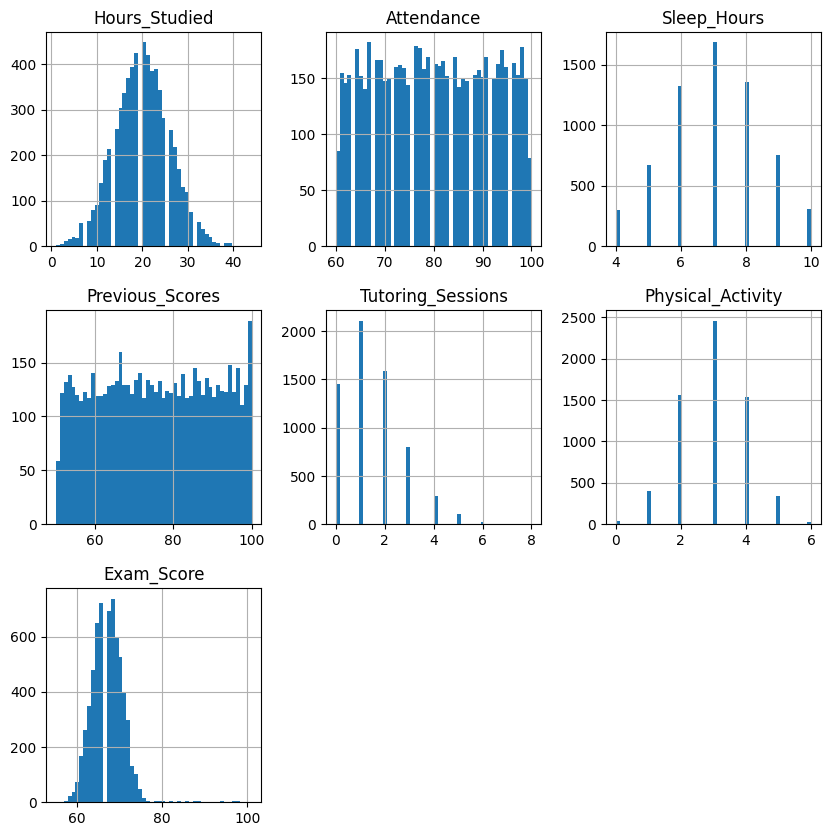

In [ ]:
# Quantative Data Visualiztation
quantative_data.hist(bins=50, figsize=(10,10))
plt.show()

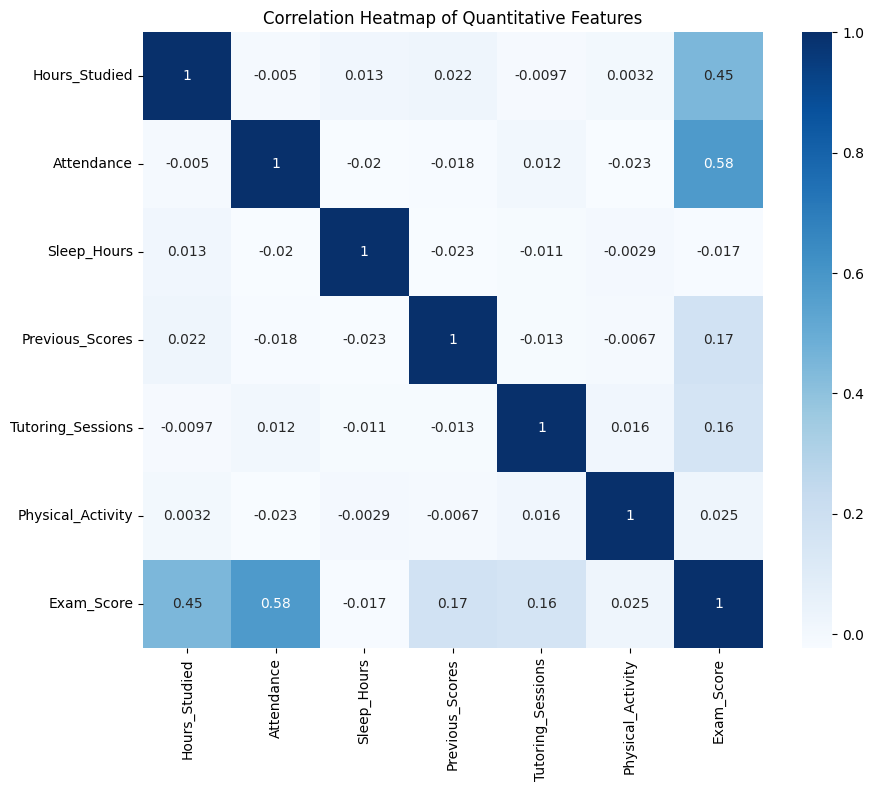

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(quantative_data.corr(), annot=True, cmap='Blues')
plt.title("Correlation Heatmap of Quantitative Features")
plt.show()

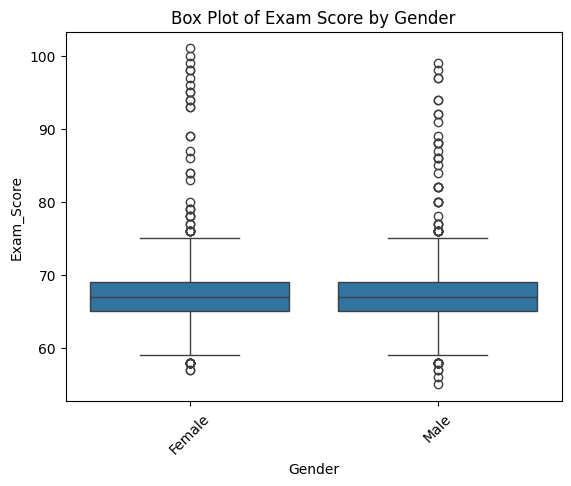

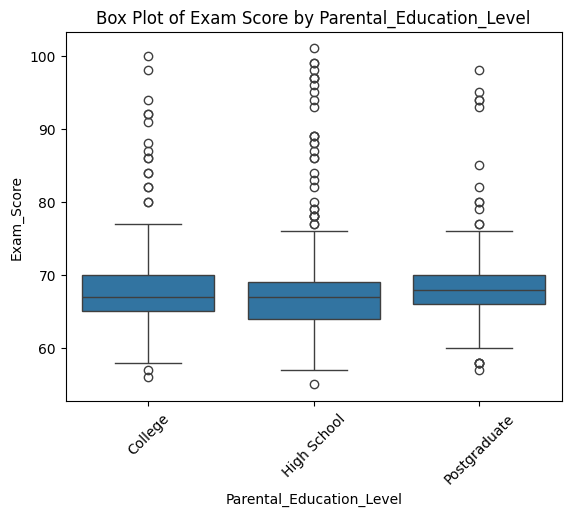

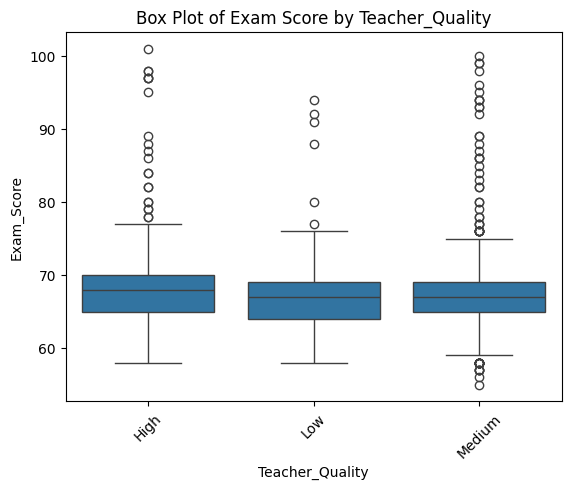

In [ ]:
categorical_cols = ['Gender', 'Parental_Education_Level', 'Teacher_Quality']
for col in categorical_cols:
    sns.boxplot(x=col, y="Exam_Score", data=df)
    plt.title(f"Box Plot of Exam Score by {col}")
    plt.xticks(rotation=45)
    plt.show()

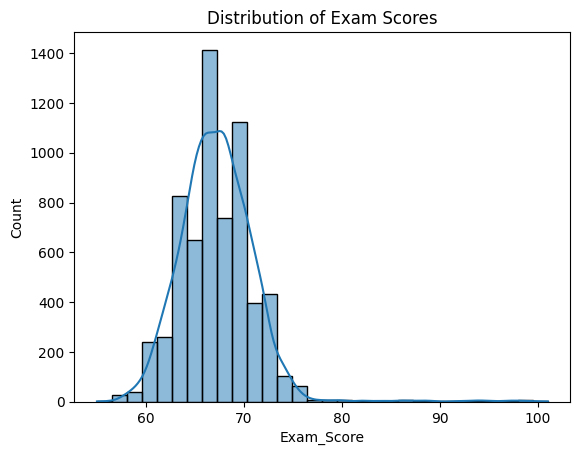

In [ ]:
sns.histplot(df['Exam_Score'], bins=30, kde=True)
plt.title("Distribution of Exam Scores")
plt.show()

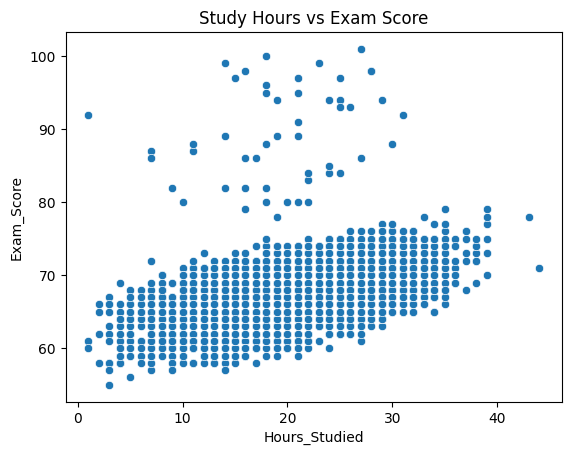

In [ ]:
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=df)
plt.title("Study Hours vs Exam Score")
plt.show()

In [ ]:
encoder = LabelEncoder()
for col in qualitative_data.columns:
    df[col] = encoder.fit_transform(df[col])
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,0,2,0,7,76,2,1,1,0,2,1,2,2,0,1,2,0,68
6603,23,76,0,2,0,8,81,2,1,3,1,0,1,2,2,0,1,2,0,69
6604,20,90,2,1,1,6,65,1,1,3,1,2,1,0,2,0,2,2,0,68
6605,10,86,0,0,1,6,91,0,1,2,1,2,0,2,3,0,1,0,0,68


In [ ]:
x = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
# Evaluate both models
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} Performance")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"R²: {r2:.2f}")
    print("-" * 30)
evaluate_model("Linear Regression", y_test, y_pred)

Linear Regression Performance
MAE: 1.06
MSE: 5.22
R²: 0.66
------------------------------


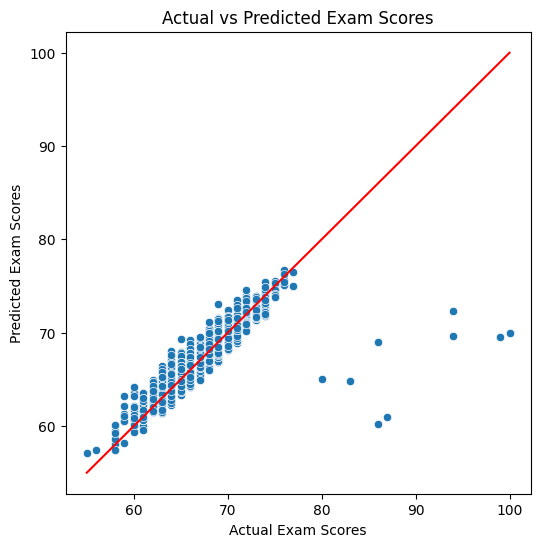

In [ ]:
# Visualize predictions
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Actual vs Predicted Exam Scores")
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.transform(x_test)

In [ ]:
poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)
y_pred_poly = poly_model.predict(x_test_poly)

In [ ]:
evaluate_model("Polynomial Regression", y_test, y_pred_poly)
evaluate_model("Linear Regression", y_test, y_pred)

Polynomial Regression Performance
MAE: 0.61
MSE: 4.41
R²: 0.72
------------------------------
Linear Regression Performance
MAE: 1.06
MSE: 5.22
R²: 0.66
------------------------------


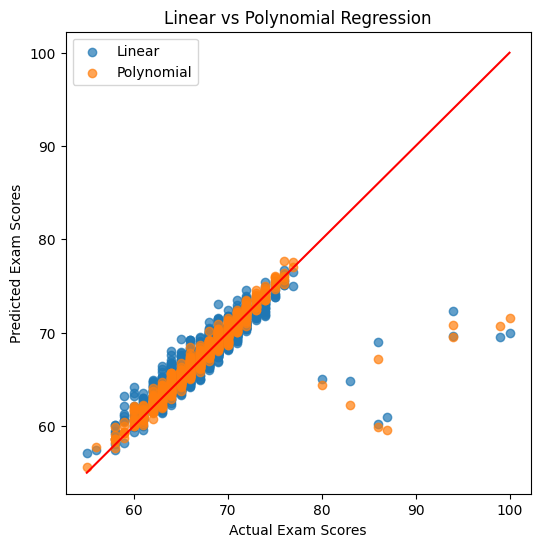

In [ ]:
# Visualization
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, label='Linear', alpha=0.7)
plt.scatter(y_test, y_pred_poly, label='Polynomial', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Linear vs Polynomial Regression")
plt.legend()
plt.show()